In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,random_state=42)

In [23]:
tree = DecisionTreeClassifier()
train_tree = tree.fit(X_train,y_train)
print("Accuracy on train set: ", train_tree.score(X_train,y_train))
print("Accuracy on test set: ", train_tree.score(X_test,y_test))


Accuracy on train set:  1.0
Accuracy on test set:  0.9300699300699301


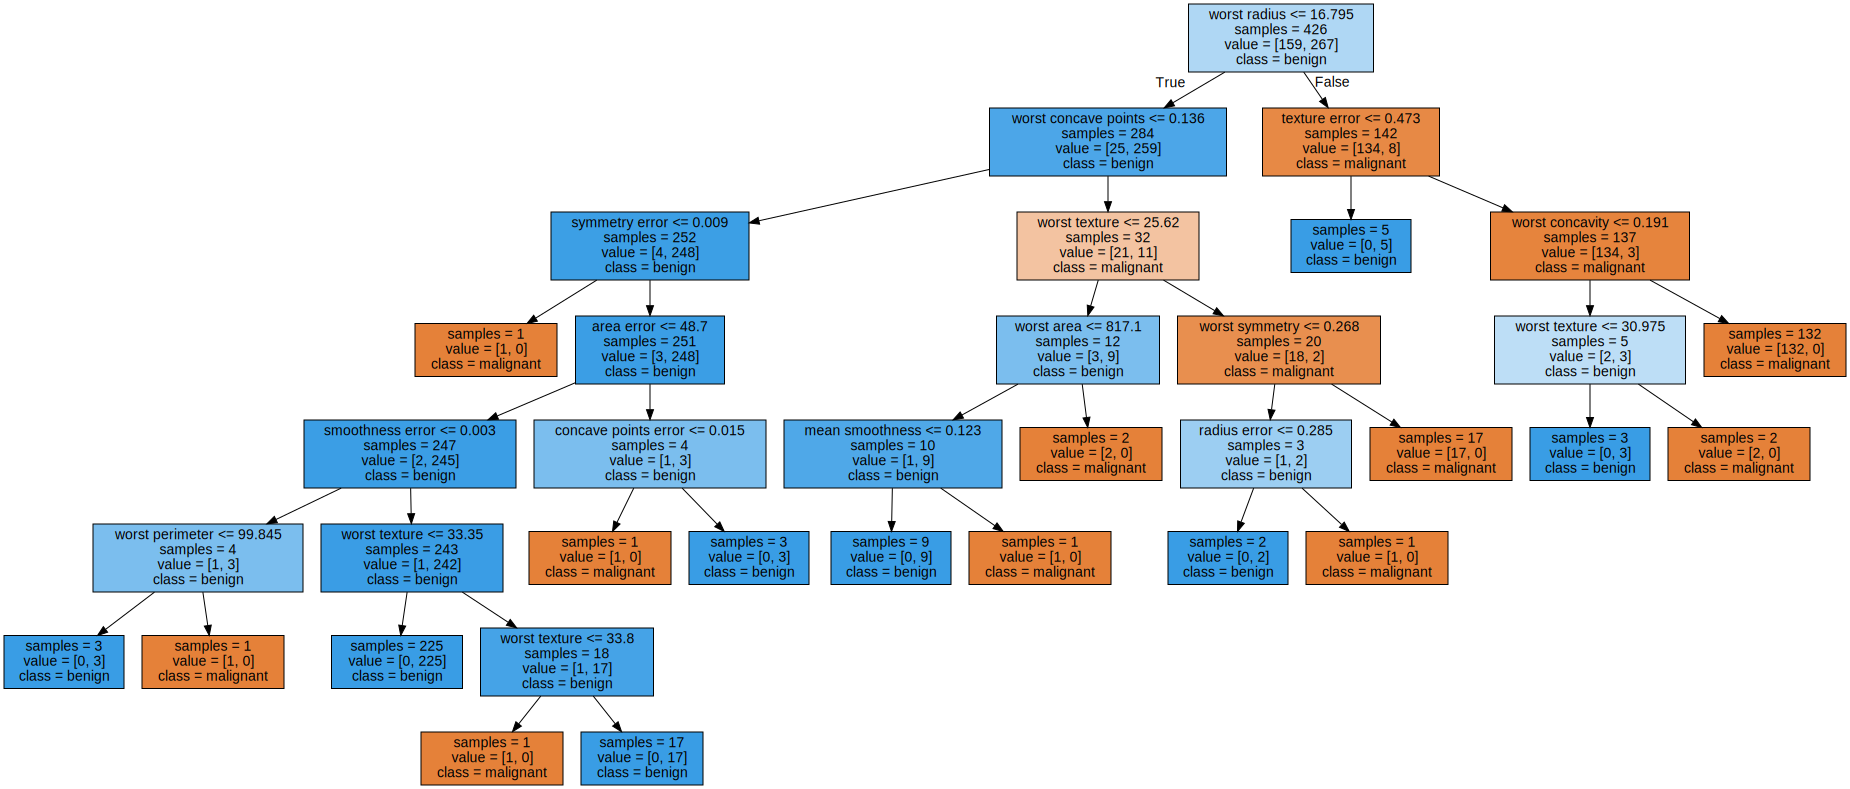

In [24]:
# Graphical display of unpruned decision tree
from sklearn.tree import export_graphviz
export_graphviz(train_tree,out_file="train_tree.dot",class_names=["malignant","benign"],
                feature_names=cancer.feature_names,impurity=False,filled=True)
import graphviz
with open("train_tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [25]:
print("Print unpruned tree's feature importance: ")
print(train_tree.feature_importances_)

Print unpruned tree's feature importance: 
[0.         0.         0.         0.         0.00903116 0.
 0.         0.         0.         0.         0.00668975 0.04630969
 0.         0.00231135 0.00238745 0.         0.         0.00752597
 0.00975731 0.         0.69546322 0.05383211 0.00752597 0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


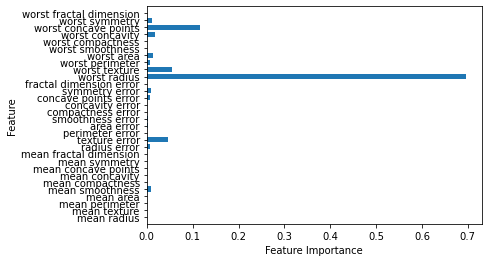

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
#plotting the graph similar to linear models 
def plot_feature_importances(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1,n_features)
plot_feature_importances(train_tree)  

In [26]:
##Accuracy of the above the execution for the train set is 100% - pre-pruned the tree to avoid overfitting #####
tree_preprune = DecisionTreeClassifier(max_depth=4,random_state=0)
tree_preprune.fit(X_train,y_train)
print("Accuracy of train set: ",tree_preprune.score(X_train,y_train))
print("Accuracy of test set: ",tree_preprune.score(X_test,y_test))

Accuracy of train set:  0.9882629107981221
Accuracy of test set:  0.951048951048951


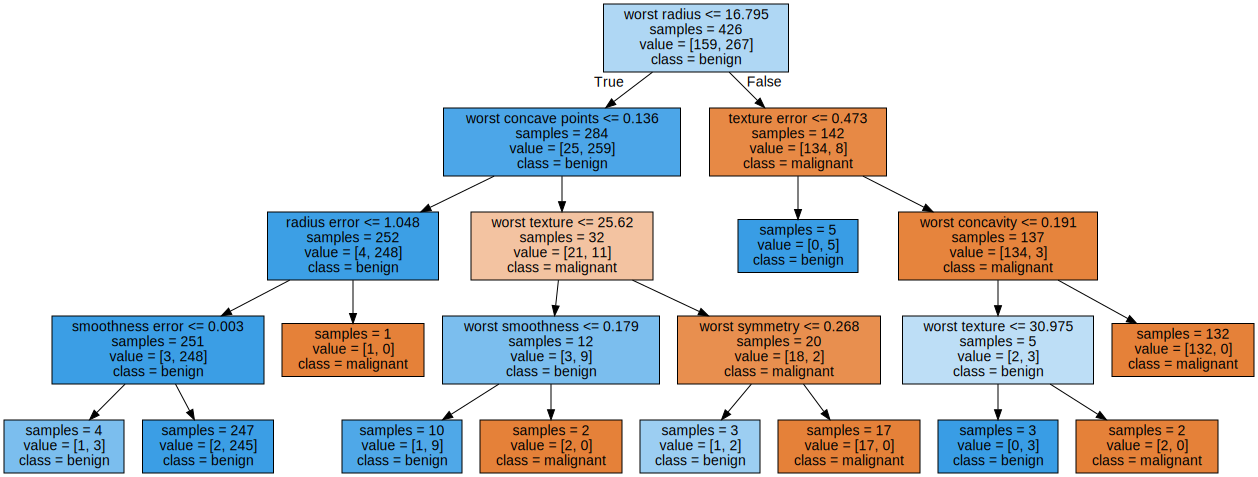

In [27]:
## Graphical display of pruned decision tree
from sklearn.tree import export_graphviz
export_graphviz(tree_preprune,out_file="tree_preprune.dot",class_names=["malignant","benign"],
                feature_names=cancer.feature_names,impurity=False,filled=True)
import graphviz
with open("tree_preprune.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [28]:
print("Pre=pruned tree's feature importance: ")
print(tree_preprune.feature_importances_)

Pre=pruned tree's feature importance: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [29]:
cancer.data.shape

(569, 30)

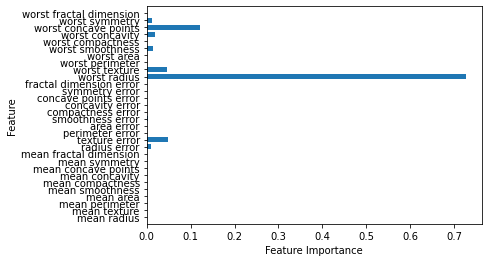

In [37]:
plot_feature_importances(tree_preprune)

Feature importances: [0. 1.]


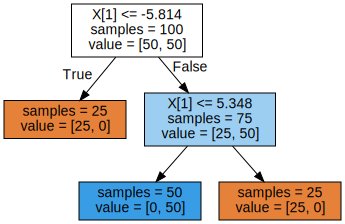

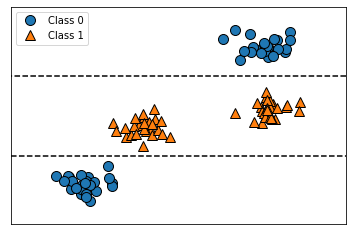

In [39]:
import mglearn 
preprune_tree = mglearn.plots.plot_tree_not_monotone()
display(preprune_tree)